# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `assets/Employee_Movie_Choices.txt`.

A second file, `assets/Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    #%matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights);
    else:
        nx.draw_networkx(G, pos,);

In [87]:
!head -5 assets/Employee_Movie_Choices.txt

#Employee	Movie
Andy	Anaconda
Andy	Mean Girls
Andy	The Matrix
Claude	Anaconda


In [88]:
!head -5 assets/Employee_Relationships.txt

Andy	Claude	0
Andy	Frida	20
Andy	Georgia	-10
Andy	Joan	30
Andy	Lee	-10


### Question 1

Using NetworkX, load in the bipartite graph from `assets/Employee_Movie_Choices.txt` and return that graph.

*This function should return a bipartite networkx graph with 19 nodes and 24 edges*

In [18]:
def answer_one():
    from networkx.algorithms import bipartite
    # Load the bipartite graph from the file
    G = nx.read_edgelist('assets/Employee_Movie_Choices.txt', delimiter="\t")
    
    # Print the graph to verify it has been loaded correctly
    print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    return G

# Call the function to test it
answer_one()

Graph has 19 nodes and 24 edges.


In [19]:
assert type(answer_one()) == nx.Graph , "Your return type should be a Graph object"



Graph has 19 nodes and 24 edges.


### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a bipartite networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [153]:
from networkx.algorithms import bipartite

def answer_two():
    G = answer_one()

    # Assuming you know which set represents employees
    employees, movies = bipartite.sets(G)
    
    for node in G.nodes():
        if node in employees:
            G.nodes[node]['type'] = 'employee'
        else:
            G.nodes[node]['type'] = 'movie'
    
    return G
G = answer_two()  # Call your function to get the updated graph
for node, data in G.nodes(data=True):
    print(f"Node: {node}, Type: {data['type']}")

Graph has 19 nodes and 24 edges.
Node: Andy, Type: employee
Node: Anaconda, Type: movie
Node: Mean Girls, Type: movie
Node: The Matrix, Type: movie
Node: Claude, Type: employee
Node: Monty Python and the Holy Grail, Type: movie
Node: Snakes on a Plane, Type: movie
Node: Frida, Type: employee
Node: The Shawshank Redemption, Type: movie
Node: The Social Network, Type: movie
Node: Georgia, Type: employee
Node: Joan, Type: employee
Node: Forrest Gump, Type: movie
Node: Kung Fu Panda, Type: movie
Node: Lee, Type: employee
Node: Pablo, Type: employee
Node: The Dark Knight, Type: movie
Node: Vincent, Type: employee
Node: The Godfather, Type: movie


In [151]:
assert type(answer_two()) == nx.Graph , "Your return type should be a Graph object"


Graph has 19 nodes and 24 edges.


### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [154]:
from networkx.algorithms import bipartite

def answer_three():
    # Get the bipartite graph from answer_two
    G = answer_two()
    
    # Extract employee nodes
    employees = [node for node, data in G.nodes(data=True) if data['type'] == 'employee']
    
    # Compute the weighted projection on the employee nodes
    projected_graph = bipartite.weighted_projected_graph(G, employees)
    
    return projected_graph

Graph has 19 nodes and 24 edges.


EdgeDataView([('Andy', 'Joan', {'weight': 1}), ('Andy', 'Frida', {'weight': 1}), ('Andy', 'Claude', {'weight': 1}), ('Andy', 'Pablo', {'weight': 1}), ('Andy', 'Georgia', {'weight': 1}), ('Andy', 'Lee', {'weight': 1}), ('Claude', 'Georgia', {'weight': 3}), ('Frida', 'Pablo', {'weight': 2}), ('Frida', 'Vincent', {'weight': 2}), ('Joan', 'Lee', {'weight': 3}), ('Pablo', 'Vincent', {'weight': 1})])

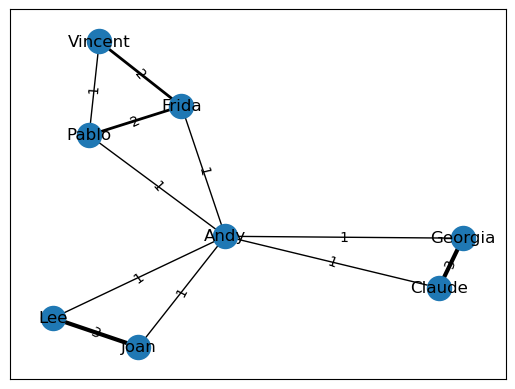

In [155]:
G = answer_three()
plot_graph(G, weight_name="weight")
G.edges(data = True)

In [156]:
G_proj = answer_three()  # Get the projected graph
for u, v, data in G_proj.edges(data=True):
    print(f"Edge between {u} and {v} has weight {data['weight']}")

Graph has 19 nodes and 24 edges.
Edge between Andy and Joan has weight 1
Edge between Andy and Frida has weight 1
Edge between Andy and Claude has weight 1
Edge between Andy and Pablo has weight 1
Edge between Andy and Georgia has weight 1
Edge between Andy and Lee has weight 1
Edge between Claude and Georgia has weight 3
Edge between Frida and Pablo has weight 2
Edge between Frida and Vincent has weight 2
Edge between Joan and Lee has weight 3
Edge between Pablo and Vincent has weight 1


In [135]:
assert type(answer_three()) == nx.Graph , "Your return type should be a Graph object"


Graph has 19 nodes and 24 edges.
Andy: {'type': 'employee'}
Anaconda: {'type': 'movie'}
Mean Girls: {'type': 'movie'}
The Matrix: {'type': 'movie'}
Claude: {'type': 'employee'}
Monty Python and the Holy Grail: {'type': 'movie'}
Snakes on a Plane: {'type': 'movie'}
Frida: {'type': 'employee'}
The Shawshank Redemption: {'type': 'movie'}
The Social Network: {}
Georgia: {'type': 'employee'}
Joan: {'type': 'employee'}
Forrest Gump: {'type': 'movie'}
Kung Fu Panda: {}
Lee: {'type': 'employee'}
Pablo: {'type': 'employee'}
The Dark Knight: {'type': 'movie'}
Vincent: {'type': 'employee'}
The Godfather: {'type': 'movie'}


### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the pearson correlation between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [159]:
import pandas as pd

def answer_four():
    # Load the weighted projected graph from answer_three
    G = answer_three()
    
    # Convert the edges of the weighted projection graph to a DataFrame
    common_movie_df = pd.DataFrame(G.edges(data=True), columns=[0, 1, 'common_movies'])
    common_movie_df['common_movies'] = common_movie_df['common_movies'].map(lambda x: x['weight'])
    
    # Read in the relationships data from the file
    relation_df = pd.read_csv('assets/Employee_Relationships.txt', delimiter="\t", header=None, names=[0, 1, 'Relations'])
    
    # Merge the relationship data with the common movie data
    merged = relation_df.merge(common_movie_df, on=[0, 1], how='left')
    
    # Fill NaN values with 0 (for pairs with no common movies)
    merged.fillna(0, inplace=True)
    
    # Calculate the Pearson correlation between 'Relations' and 'common_movies'
    correlation = merged[['Relations', 'common_movies']].corr().iloc[0, 1]
    
    return float(correlation)

In [160]:
ans_four = answer_four()

Graph has 19 nodes and 24 edges.


In [162]:
correlation = answer_four()
print(f"Pearson Correlation: {correlation}")

Graph has 19 nodes and 24 edges.
Pearson Correlation: 0.7883962221733474
